<a href="https://colab.research.google.com/github/Altemir1/Data_analysis/blob/main/SpaceX_Falcon_9_Stage_Landing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data collection

In [68]:
import requests

# SpaceX API
url = "https://api.spacexdata.com/v4/launches/past"
response = requests.get(url)
response.json()

[{'fairings': {'reused': False,
   'recovery_attempt': False,
   'recovered': False,
   'ships': []},
  'links': {'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png',
    'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'},
   'reddit': {'campaign': None,
    'launch': None,
    'media': None,
    'recovery': None},
   'flickr': {'small': [], 'original': []},
   'presskit': None,
   'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88',
   'youtube_id': '0a_00nJ_Y88',
   'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html',
   'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'},
  'static_fire_date_utc': '2006-03-17T00:00:00.000Z',
  'static_fire_date_unix': 1142553600,
  'net': False,
  'window': 0,
  'rocket': '5e9d0d95eda69955f709d1eb',
  'success': False,
  'failures': [{'time': 33,
    'altitude': None,
    'reason': 'merlin engine failure'}],
  'details': 'Engine failure at 33 seconds and loss of vehicle',
  'crew

In [69]:
import pandas as pd

# Convert json response into data table format

data = pd.json_normalize(response.json())
data.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [70]:
#Global variables
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [71]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])


In [72]:
import datetime

# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [73]:
getBoosterVersion(data)

In [27]:
BoosterVersion

['Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 1',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon Heavy',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon 9',
 'Falcon

In [74]:
getLaunchSite(data)
getCoreData(data)
getPayloadData(data)

In [75]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


In [79]:
count = 0
for element in list(launch_dict["BoosterVersion"]):
    if element == "Falcon 9":
      count+= 1
print(count)

90


In [31]:
# Pad arrays in the dict
max_length = max([len(v) for v in launch_dict.values()])

for key, value in launch_dict.items():
    if len(value) < max_length:
        launch_dict[key] = value + [None] * (max_length - len(value))


In [80]:
data = pd.DataFrame(launch_dict)
data.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [81]:
# Filter out Falcon 1
data_falcon9 = data[data["BoosterVersion"] != "Falcon 1"]
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


In [82]:
# Reset the flightNumber column
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
91,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [83]:
# Checking null values in the data frame
data_falcon9.isnull().sum()

,0
FlightNumber,0
Date,0
BoosterVersion,0
PayloadMass,5
Orbit,0
LaunchSite,0
Outcome,0
Flights,0
GridFins,0
Reused,0


In [84]:
# Calculating mean of Payload Mass and replacing with it null values
payload_mass_mean = data_falcon9.PayloadMass.mean()
data_falcon9.PayloadMass.fillna(payload_mass_mean, inplace=True)

<ipython-input-84-9228273764e0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_falcon9.PayloadMass.fillna(payload_mass_mean, inplace=True)
<ipython-input-84-9228273764e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9.PayloadMass.fillna(payload_mass_mean, inplace=True)


In [85]:
data_falcon9.BoosterVersion.value_counts()

,count
BoosterVersion,
Falcon 9,90


In [86]:
data_falcon9.isnull().sum()

,0
FlightNumber,0
Date,0
BoosterVersion,0
PayloadMass,0
Orbit,0
LaunchSite,0
Outcome,0
Flights,0
GridFins,0
Reused,0


Web scraping additional data

In [43]:
# Importing necessary libraries
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [40]:
# Helper function in scraping wiki
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()

    colunm_name = ' '.join(row.contents)

    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name



In [44]:
# URL for the page
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

response = requests.get(static_url)

soup = BeautifulSoup(response.content, "html.parser")

soup.title


<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

In [45]:
# Taking all tables from the wikipidea
html_tables = soup.find_all('table')

In [46]:
# Let's print the third table and check its content
first_launch_table = html_tables[2]
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 

In [50]:
column_names = []

tables_headers = first_launch_table.find_all("th")

for th in tables_headers:
    name = extract_column_from_header(th)
    if name is not None and len(name) > 0:
      column_names.append(name)

print(column_names)

['Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome']


In [51]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [59]:
extracted_row = 0
#Extract each table
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element
        row=rows.find_all('td')
        #if it is number save cells in a dictonary
        if flag:
            extracted_row += 1
            # Flight Number value
            # TODO: Append the flight_number into launch_dict with key `Flight No.`
            print(flight_number)
            datatimelist=date_time(row[0])
            launch_dict['Flight No.'].append(flight_number)

            # Date value
            # TODO: Append the date into launch_dict with key `Date`
            date = datatimelist[0].strip(',')
            print(date)
            launch_dict['Date'].append(date)

            # Time value
            # TODO: Append the time into launch_dict with key `Time`
            time = datatimelist[1]
            print(time)
            launch_dict['Time'].append(time)

            # Booster version
            # TODO: Append the bv into launch_dict with key `Version Booster`
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            print(bv)
            launch_dict['Version Booster'].append(bv)

            # Launch Site
            # TODO: Append the bv into launch_dict with key `Launch Site`
            launch_site = row[2].a.string
            print(launch_site)
            launch_dict['Launch site'].append(launch_site)

            # Payload
            # TODO: Append the payload into launch_dict with key `Payload`
            payload = row[3].a.string
            print(payload)
            launch_dict['Payload'].append(payload)

            # Payload Mass
            # TODO: Append the payload_mass into launch_dict with key `Payload mass`
            payload_mass = get_mass(row[4])
            print(payload)
            launch_dict['Payload mass'].append(payload_mass)

            # Orbit
            # TODO: Append the orbit into launch_dict with key `Orbit`
            orbit = row[5].a.string
            print(orbit)
            launch_dict['Orbit'].append(orbit)

            # Customer
            # TODO: Append the customer into launch_dict with key `Customer
            try:
              customer = row[6].a.string
            except:
              customer = "None"
            print(customer)
            launch_dict['Customer'].append(customer)

            # Launch outcome
            # TODO: Append the launch_outcome into launch_dict with key `Launch outcome`
            launch_outcome = list(row[7].strings)[0]
            print(launch_outcome)
            launch_dict['Launch outcome'].append(launch_outcome)

            # Booster landing
            # TODO: Append the launch_outcome into launch_dict with key `Booster landing`
            booster_landing = landing_status(row[8])
            print(booster_landing)
            launch_dict['Booster landing'].append(booster_landing)


1
4 June 2010
18:45
F9 v1.07B0003.18
CCAFS
Dragon Spacecraft Qualification Unit
Dragon Spacecraft Qualification Unit
LEO
SpaceX
Success

Failure
2
8 December 2010
15:43
F9 v1.07B0004.18
CCAFS
Dragon
Dragon
LEO
NASA
Success
Failure
3
22 May 2012
07:44
F9 v1.07B0005.18
CCAFS
Dragon
Dragon
LEO
NASA
Success
No attempt

4
8 October 2012
00:35
F9 v1.07B0006.18
CCAFS
SpaceX CRS-1
SpaceX CRS-1
LEO
NASA
Success

No attempt
5
1 March 2013
15:10
F9 v1.07B0007.18
CCAFS
SpaceX CRS-2
SpaceX CRS-2
LEO
NASA
Success

No attempt

6
29 September 2013
16:00
F9 v1.17B10038
VAFB
CASSIOPE
CASSIOPE
Polar orbit
MDA
Success
Uncontrolled
7
3 December 2013
22:41
F9 v1.1
CCAFS
SES-8
SES-8
GTO
SES
Success
No attempt
8
6 January 2014
22:06
F9 v1.1
CCAFS
Thaicom 6
Thaicom 6
GTO
Thaicom
Success
No attempt
9
18 April 2014
19:25
F9 v1.1
Cape Canaveral
SpaceX CRS-3
SpaceX CRS-3
LEO
NASA
Success

Controlled
10
14 July 2014
15:15
F9 v1.1
Cape Canaveral
Orbcomm-OG2
Orbcomm-OG2
LEO
Orbcomm
Success
Controlled
11
5 August 2014

In [60]:
df= pd.DataFrame({ key:pd.Series(value) for key, value in launch_dict.items() })

In [61]:
df.head()

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,F9 v1.07B0003.18,Failure,4 June 2010,18:45
1,2,CCAFS,Dragon,0,LEO,NASA,Success,F9 v1.07B0004.18,Failure,8 December 2010,15:43
2,3,CCAFS,Dragon,525 kg,LEO,NASA,Success,F9 v1.07B0005.18,No attempt\n,22 May 2012,07:44
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA,Success\n,F9 v1.07B0006.18,No attempt,8 October 2012,00:35
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success\n,F9 v1.07B0007.18,No attempt\n,1 March 2013,15:10


In [62]:
df.to_csv('spacex_web_scraped.csv', index=False)

# Data Wrangling

In [88]:
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


In [89]:
data_falcon9.isnull().sum()/len(data_falcon9)*100

,0
FlightNumber,0.000000
Date,0.000000
BoosterVersion,0.000000
PayloadMass,0.000000
Orbit,0.000000
LaunchSite,0.000000
Outcome,0.000000
Flights,0.000000
GridFins,0.000000
Reused,0.000000


In [90]:
df = data_falcon9
df.to_csv("data_falcon9_verison1.csv")

In [91]:
df.LaunchSite.value_counts()

,count
LaunchSite,
CCSFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


In [92]:
df.Orbit.value_counts()

,count
Orbit,
GTO,27
ISS,21
VLEO,14
PO,9
LEO,7
SSO,5
MEO,3
ES-L1,1
HEO,1


In [93]:
landing_outcomes = df['Outcome'].value_counts()

In [94]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [95]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [96]:
landing_class = []
for outcome in df["Outcome"]:
   if outcome in bad_outcomes:
    landing_class.append(0)
   else:
    landing_class.append(1)

print(landing_class)

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [97]:
df["Class"] = landing_class
df[["Class"]].head(8)

<ipython-input-97-ab7611c20168>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"] = landing_class


,Class
4,0
5,0
6,0
7,0
8,0
9,0
10,1
11,1


In [98]:
df["Class"].mean()

0.6666666666666666

In [100]:
df.to_csv("data_falcon9_version2.csv")

# Exploratory Data Analysis

In [101]:
!pip install sqlalchemy==1.3.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 37.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp310-cp310-linux_x86_64.whl size=1192325 sha256=7a269745c131fc1934681a229fe204a11aa33d7c11cbe51f85ffe0225dc76356
  Stored in directory: /root/.cache/pip/wheels/8b/6d/9c/e1793e5a2d85b89b8c362a4f0e3def54b786bcd14923b9ff00
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.35
    Uninstalling SQLAlchemy-2.0.35:
      Successfully uninstalled SQLAlchemy-2.0.35
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.19.0 requires sqlalchemy<3.0dev,>=1.4, but you have sqlalchemy 1.3.9 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.


In [102]:
!pip install ipython-sql

  Using cached SQLAlchemy-2.0.35-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.6 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached SQLAlchemy-2.0.35-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [106]:
%load_ext sql

In [103]:
import csv, sqlite3


con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [104]:
!pip install -q pandas

In [107]:
%sql sqlite:///my_data1.db

In [108]:
import pandas as pd
df = pd.read_csv("Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")


101

In [109]:
%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [110]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [112]:
%sql select distinct Launch_Site from SPACEXTABLE

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [115]:
%sql select Launch_Site from SPACEXTABLE where Launch_site like "CCA%" limit 5

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40


In [117]:
%%sql
select SUM(PAYLOAD_MASS__KG_) as total_payload_mass from SPACEXTABLE

 * sqlite:///my_data1.db
Done.


total_payload_mass
619967


In [119]:
%%sql
select AVG(PAYLOAD_MASS__KG_) as average_payload_mass from SPACEXTABLE where Booster_Version like 'F9 v1.1%'

 * sqlite:///my_data1.db
Done.


average_payload_mass
2534.6666666666665


In [121]:
%sql select min(Date) from SPACEXTABLE where Landing_Outcome like 'Success (ground pad)'

 * sqlite:///my_data1.db
Done.


min(Date)
2015-12-22


In [123]:
%%sql
select Booster_Version from SPACEXTABLE Where Landing_Outcome = "Success (drone ship)" and PAYLOAD_MASS__KG_ > 4000 and PAYLOAD_MASS__KG_ < 6000

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


In [124]:
%sql select Mission_Outcome, count(Mission_Outcome) from SPACEXTABLE group by Mission_Outcome

 * sqlite:///my_data1.db
Done.


Mission_Outcome,count(Mission_Outcome)
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


In [125]:
%%sql
select Booster_Version from SPACEXTABLE
where PAYLOAD_MASS__KG_ = (select max(PAYLOAD_MASS__KG_) from SPACEXTABLE)


 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


In [127]:
%%sql
SELECT
    CASE
        WHEN substr(Date, 6, 2) = '01' THEN 'January'
        WHEN substr(Date, 6, 2) = '02' THEN 'February'
        WHEN substr(Date, 6, 2) = '03' THEN 'March'
        WHEN substr(Date, 6, 2) = '04' THEN 'April'
        WHEN substr(Date, 6, 2) = '05' THEN 'May'
        WHEN substr(Date, 6, 2) = '06' THEN 'June'
        WHEN substr(Date, 6, 2) = '07' THEN 'July'
        WHEN substr(Date, 6, 2) = '08' THEN 'August'
        WHEN substr(Date, 6, 2) = '09' THEN 'September'
        WHEN substr(Date, 6, 2) = '10' THEN 'October'
        WHEN substr(Date, 6, 2) = '11' THEN 'November'
        WHEN substr(Date, 6, 2) = '12' THEN 'December'
    END AS month_name,
    Landing_Outcome,
    Booster_Version,
    Launch_Site
FROM
    SPACEXTABLE
WHERE
    Landing_Outcome LIKE '%Failure (drone ship)%'
    AND substr(Date, 0, 5) = '2015';

 * sqlite:///my_data1.db
Done.


month_name,Landing_Outcome,Booster_Version,Launch_Site
January,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
April,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


In [130]:
%%sql
SELECT Landing_Outcome, COUNT(Landing_Outcome)
FROM SPACEXTABLE
WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY Landing_Outcome
ORDER BY COUNT(Landing_Outcome) DESC;

 * sqlite:///my_data1.db
Done.


Landing_Outcome,COUNT(Landing_Outcome)
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


In [131]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [134]:
!pip install js

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 897.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.2 MB/s eta 0:00:00
  Created wheel for js: filename=js-1.0-py3-none-any.whl size=2883 sha256=fc70cc3bb961e1efc59e28d3a60a5eee255ce48a72dbe67cb85c9e5ffd4da6b0
  Stored in directory: /root/.cache/pip/wheels/77/dc/68/d580eaea0ef6137289a09dabe661f5df14951f5c29c08d443d
Successfully built js


In [137]:
df_v2 = pd.read_csv("data_falcon9_version2.csv")
df_v2.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [139]:
df = df_v2

In [140]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


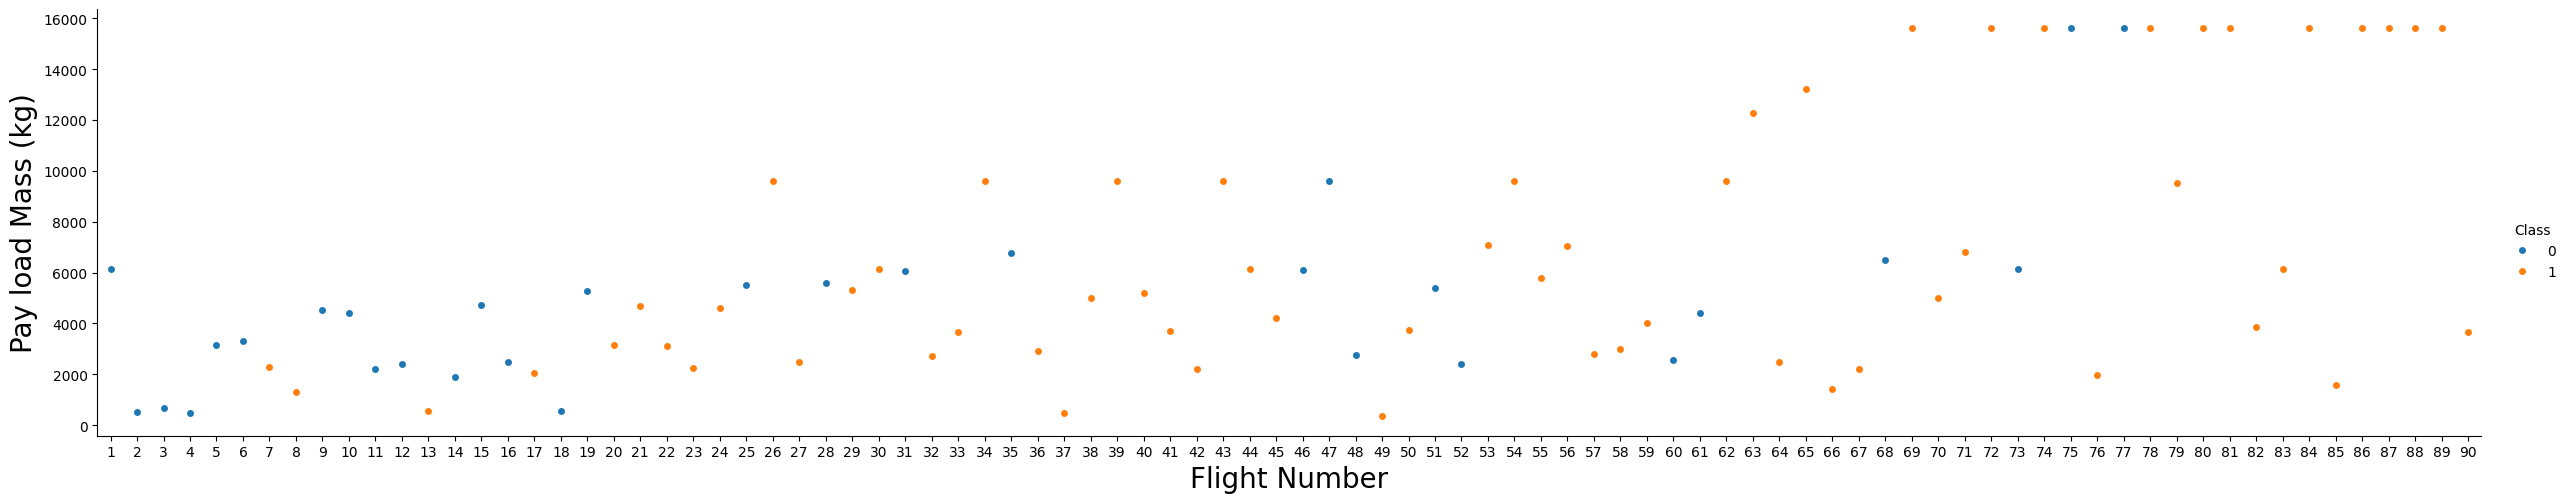

In [141]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


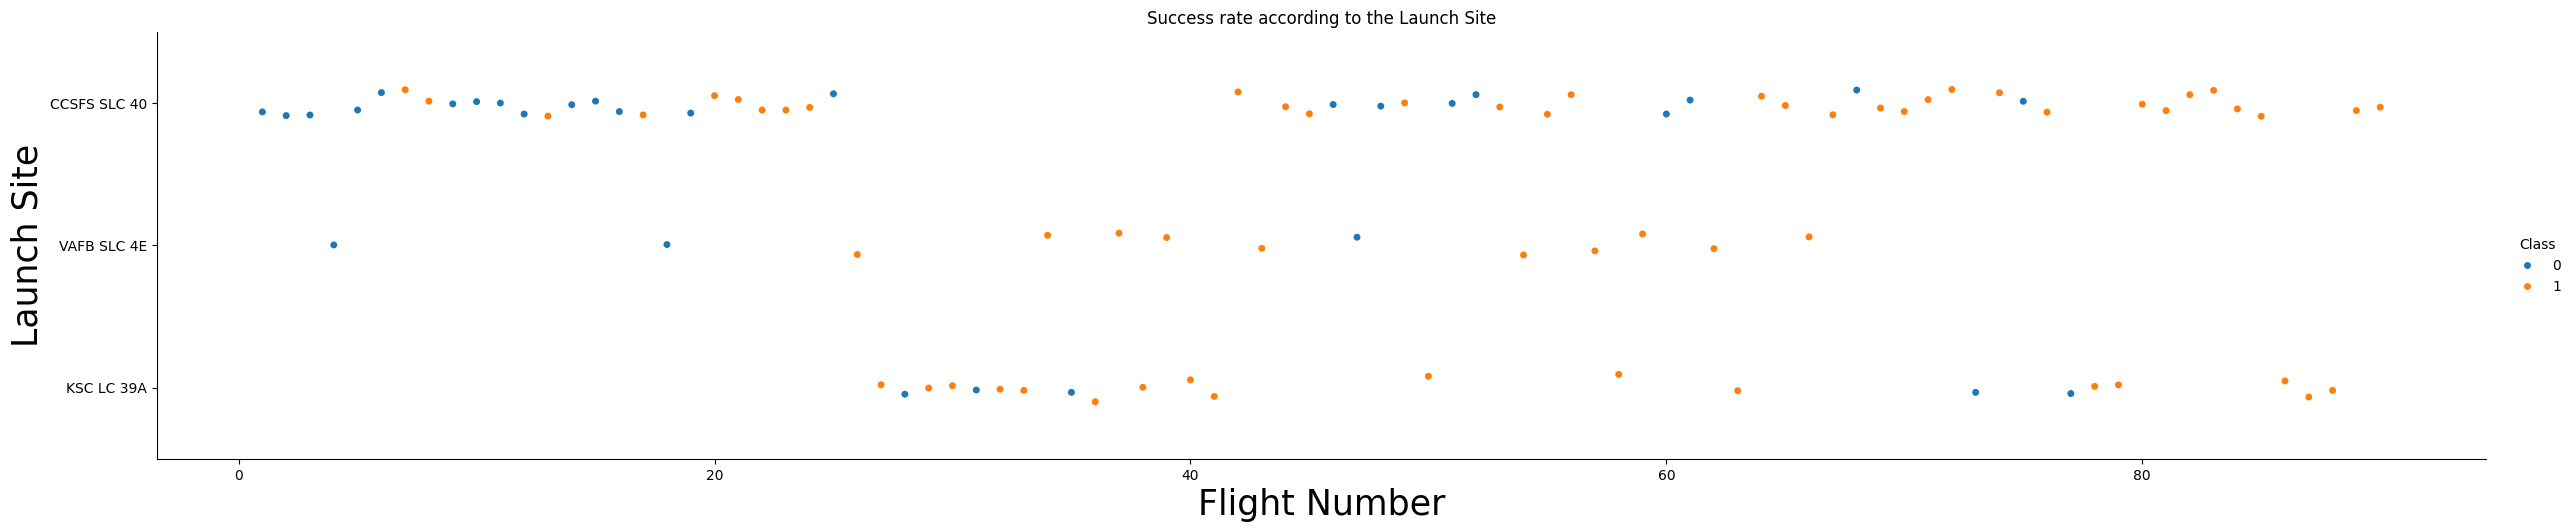

In [142]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=25)
plt.ylabel('Launch Site', fontsize=25)
plt.title("Success rate according to the Launch Site")
plt.show()

Text(0.5, 1.0, 'Success rate according to the Orbit')

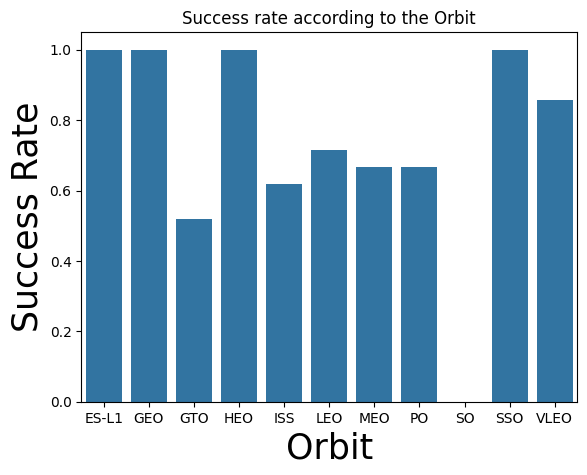

In [145]:
df_orbit = df.groupby(["Orbit"])["Class"].mean().reset_index()

sns.barplot(x="Orbit", y="Class", data=df_orbit)
plt.xlabel("Orbit", fontsize=25)
plt.ylabel('Success Rate', fontsize=25)
plt.title("Success rate according to the Orbit")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


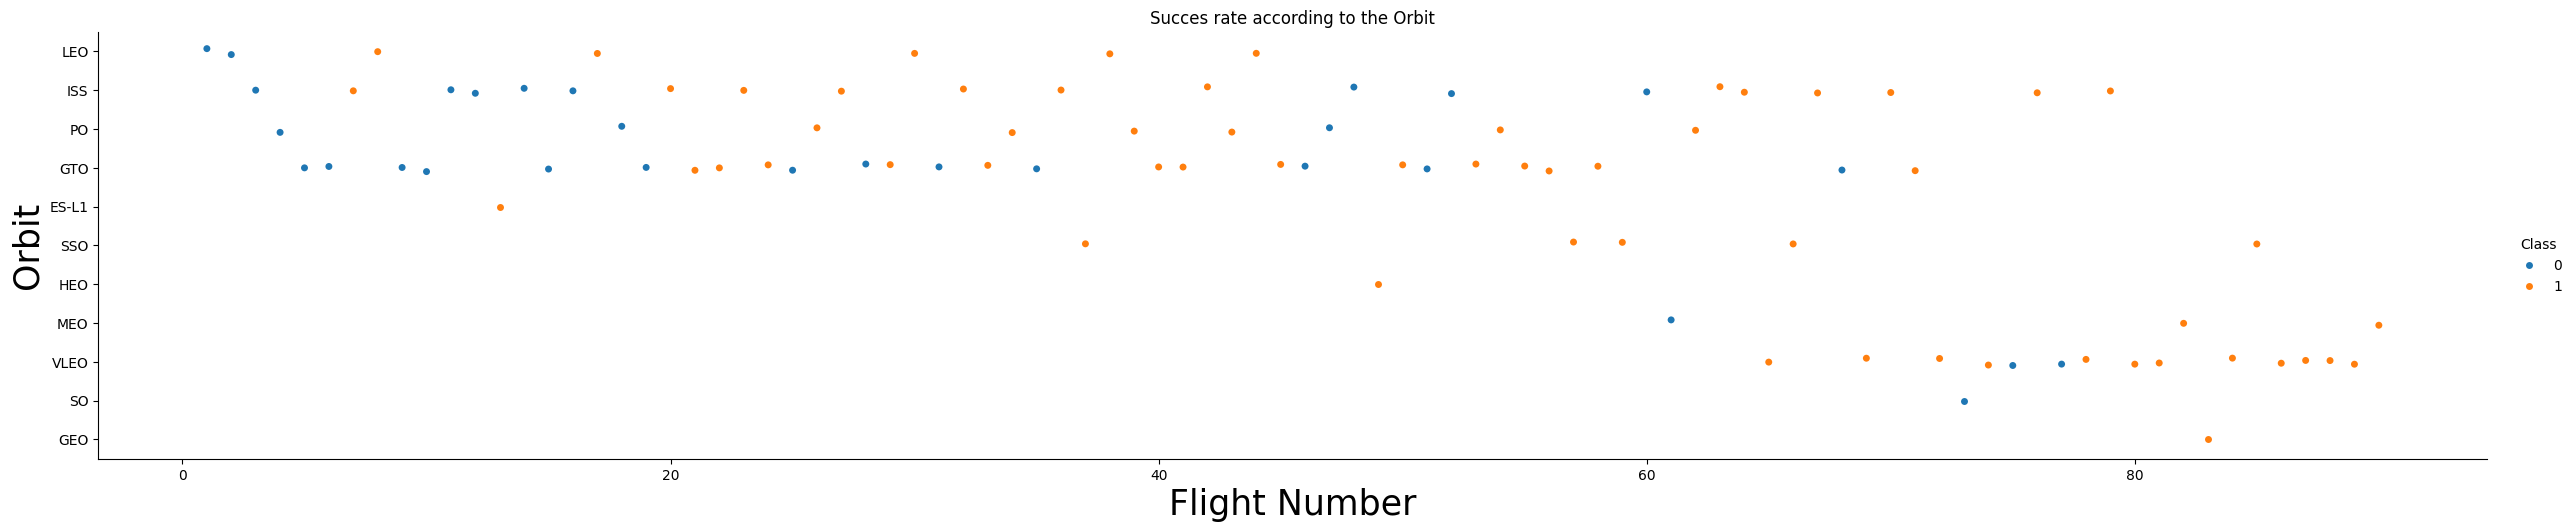

In [146]:
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=25)
plt.ylabel('Orbit', fontsize=25)
plt.title("Succes rate according to the Orbit")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


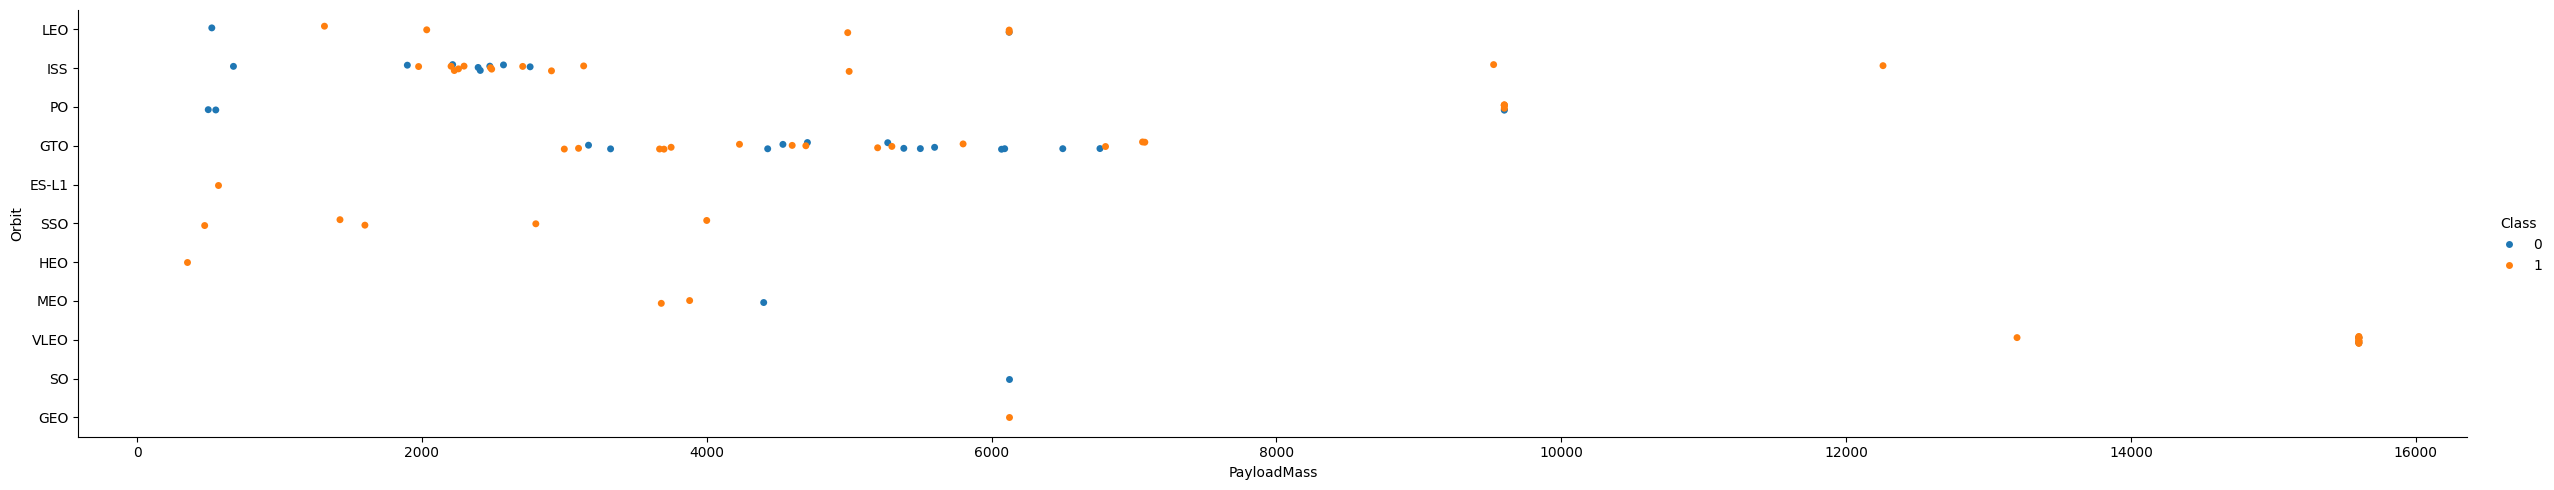

In [147]:
sns.catplot(x='PayloadMass', y="Orbit", hue="Class", data=df, aspect=5)
plt.show()

In [148]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


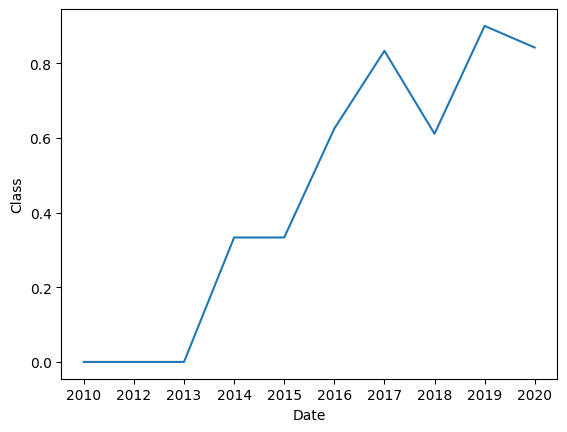

In [151]:
df_year =df.groupby("Date")["Class"].mean().reset_index()
sns.lineplot(x="Date", y="Class", data=df_year)
plt.show()

In [152]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [154]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the resulting dataframe with encoded features
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6123.547647        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0            0        False      False  ...         False         False   
1            0        False      False  ...         False         False   
2            0        False      False  ...         False         False   
3            0        False      False  ...         False         False   
4            0        False      False  ...         False         False   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0         False         False      

In [155]:
df = features_one_hot.astype("float64")
df.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
df.to_csv("data_falcon9_version3.csv")

#Interactive Dashboards (Visualization)

In [1]:
!pip install folium

In [4]:
!pip install js

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.7 MB/s eta 0:00:00
  Created wheel for js: filename=js-1.0-py3-none-any.whl size=2883 sha256=208a38b6621c27ca1a1c05901a202e88c0d15ff071cfbfaa21514dc8a70ababa
  Stored in directory: /root/.cache/pip/wheels/77/dc/68/d580eaea0ef6137289a09dabe661f5df14951f5c29c08d443d
Successfully built js


In [2]:
import pandas as pd
import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [7]:
space_launch = pd.read_csv("spacex_launch_geo.csv")
space_launch.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [8]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = space_launch[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [9]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [10]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [13]:
# Adding a marker for each launch site
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label

for index, row in launch_sites_df.iterrows():
    circle = folium.Circle(location=[row['Lat'], row['Long']], radius=1000, color='#d35400',).add_child(folium.Popup(row['Launch Site']))
    marker = folium.Marker(
        location=[row['Lat'], row['Long']],

        icon=DivIcon(icon_size=(20,20), icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % row['Launch Site'],)
    )
    site_map.add_child(circle)
    site_map.add_child(marker)

site_map

In [14]:
marker_cluster = MarkerCluster()

In [19]:
spacex_df["marker_color"] = spacex_df["class"].apply(lambda x: "green" if x == 1  else 'red')
spacex_df.head()

<ipython-input-19-e75575798185>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacex_df["marker_color"] = spacex_df["class"].apply(lambda x: "green" if x == 1  else 'red')


,Launch Site,Lat,Long,class,marker_color
0,CCAFS LC-40,28.562302,-80.577356,0,red
1,CCAFS LC-40,28.562302,-80.577356,0,red
2,CCAFS LC-40,28.562302,-80.577356,0,red
3,CCAFS LC-40,28.562302,-80.577356,0,red
4,CCAFS LC-40,28.562302,-80.577356,0,red


In [20]:
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed,
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, record in spacex_df.iterrows():
    marker = folium.Marker(
        location=[record['Lat'], record['Long']],
        icon=folium.Icon(color='white', icon_color=record['marker_color'])
    )
    marker_cluster.add_child(marker)

site_map

In [21]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [22]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [27]:
import folium
from folium.features import DivIcon

# Coordinates
coast_line_coordinate = [28.56367, -80.57163]
launch_site = [28.56321, -80.57681]

# Assume you have a calculate_distance function that returns the distance
distance = calculate_distance(coast_line_coordinate[0], coast_line_coordinate[1], launch_site[0], launch_site[1])

# Create the distance marker
distance_marker = folium.Marker(
    coast_line_coordinate,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12px; color:#d35400;"><b>{:.2f} KM</b></div>'.format(distance)
    )
)

# Add the distance marker to the map
site_map.add_child(distance_marker)

# Create the polyline (list of coordinates)
lines = folium.PolyLine(locations=[coast_line_coordinate, launch_site], weight=1)

# Add the polyline to the map
site_map.add_child(lines)

In [28]:
launch_site_coordinates = [28.57327, -80.64686]
railway = [28.57263, -80.65398]
highway = [28.57593, -80.64484]
city = [28.61045, -80.81097]

def add_distance_marker(begin, end):
  distance = calculate_distance(begin[0], begin[1], end[0], end[1])
  distance_marker = folium.Marker(
      end,
      icon=DivIcon(
          icon_size=(20,20),
          icon_anchor=(0,0),
          html='<div style="font-size: 12px; color:#d35400;"><b>{:.2f} KM</b></div>'.format(distance)
      )
  )
  site_map.add_child(distance_marker)
    # Create the polyline (list of coordinates)
  lines = folium.PolyLine(locations=[end, begin], weight=1)

  # Add the polyline to the map
  site_map.add_child(lines)

add_distance_marker(launch_site_coordinates, railway)
add_distance_marker(launch_site_coordinates, highway)
add_distance_marker(launch_site_coordinates, city)

site_map



#Predictive analysis

In [29]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Function to plot confusion matrix

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [31]:
data = pd.read_csv("dataset_part_2.csv")
X = pd.read_csv("dataset_part_3.csv")
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [35]:
y = data['Class']

In [36]:
type(y)

pandas.core.series.Series

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [43]:
# students get this
transform = preprocessing.StandardScaler()
X_train = transform.fit_transform(X_train)
X_test = transform.transform(X_test)

In [39]:
y_test.shape

(18,)

In [44]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
log_reg_cv = GridSearchCV(log_reg, parameters, cv=10)
log_reg_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",log_reg_cv.best_params_)
print("accuracy :",log_reg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [45]:
log_reg_cv.score(X_test, y_test)

0.8333333333333334

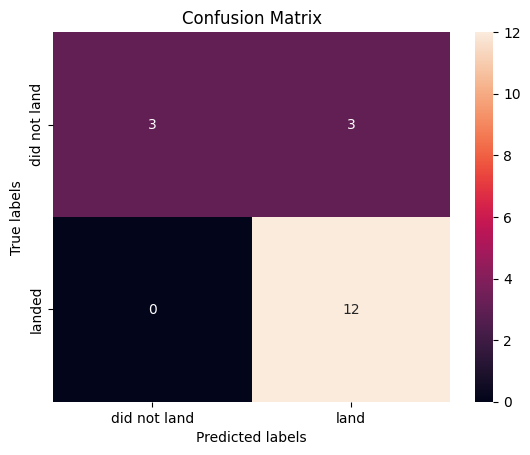

In [48]:
yhat=log_reg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [49]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [50]:
svm_cv.score(X_test, y_test)

0.8333333333333334

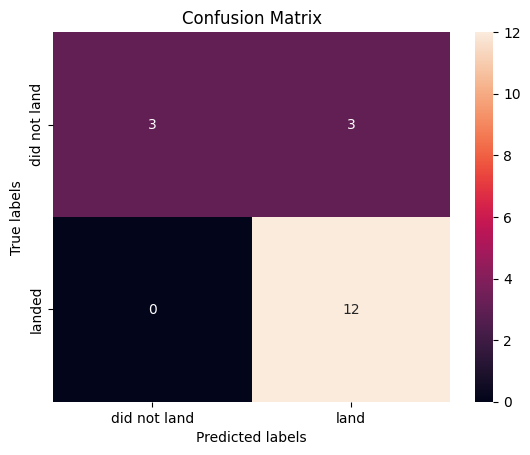

In [51]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [52]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.875


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [53]:
tree_cv.score(X_test, y_test)

0.8333333333333334

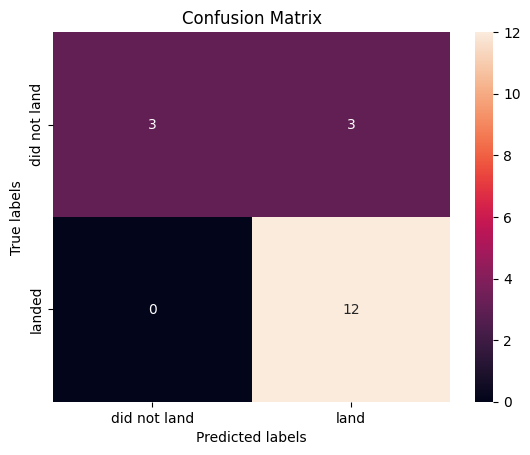

In [55]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [56]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
KNN_cv = GridSearchCV(KNN, parameters,cv=10)
KNN_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [57]:
KNN_cv.score(X_test, y_test)

0.8333333333333334

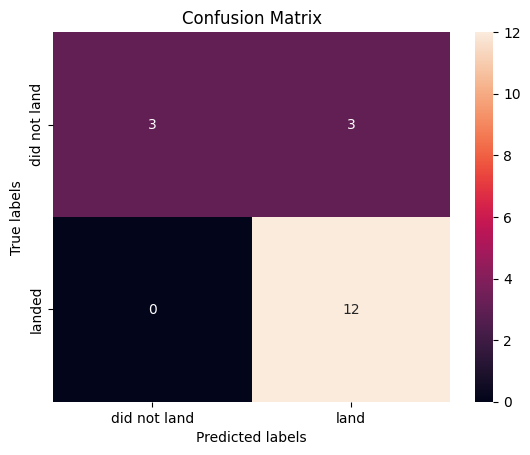

In [60]:
yhat = KNN_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)